<a href="https://colab.research.google.com/github/beniciowg/data-science-projects/blob/master/Analyzing_Violence_in_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing Violence in Rio de Janeiro

Rio de Janeiro is known as one of the most beautiful cities of the world. The city has received 1.7 million tourists during the last *réveillon* and 2.1 million for this year's Carnaval and usually amazes people with its beaches, landscapes and entertainment options.

Unfortunately, the city is also known for its violence. Rio de Janeiro suffers with high numbers of homicides, assaults, robberies and drug and gun traffic. In this notebook we will show the data available and focus our analysis in homicides and vehicles robbery.

## Data Acquisition


The dataset used in this notebook was taken from the Public Security Institute of Rio de Janeiro's [website](http://www.ispdados.rj.gov.br/estatistica.html), which has a initiave called *Dados Abertos* (Open Data). If you want to explore more, there's also a [interactive dashboard](http://www.ispvisualizacao.rj.gov.br/index.html) you can check.

The data presented in this dataset is from the occurrances registered by the Civil Police along with the Military Police of Rio de Janeiro from the year of 1991 until 2019.

### Importing data



In [ ]:
# importing the packages we are going to use
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv")

## Initial Analysis of the Data

In this step, we are going to understand our dataset better. First of all, let's check its size (number of variables (columns) and entries (lines)).


In [ ]:
# verifying the size of the dataframe
print(f'Variables: {df.shape[1]}')
print(f'Entries: {df.shape[0]}')

Variables: 56
Entries: 344


Now that we know our dataset size, let's see what data we have available by checking the variables' names and types.

In [ ]:
# information about our variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   vano                        344 non-null    int64  
 1   mes                         344 non-null    int64  
 2   hom_doloso                  344 non-null    int64  
 3   lesao_corp_morte            248 non-null    float64
 4   latrocinio                  344 non-null    int64  
 5   hom_por_interv_policial     260 non-null    float64
 6   tentat_hom                  344 non-null    int64  
 7   lesao_corp_dolosa           344 non-null    int64  
 8   estupro                     200 non-null    float64
 9   hom_culposo                 260 non-null    float64
 10  lesao_corp_culposa          248 non-null    float64
 11  roubo_comercio              344 non-null    int64  
 12  roubo_residencia            344 non-null    int64  
 13  roubo_veiculo               344 non

We can gather some information about our variables:

* The values of all the columns we are dealing with are number types.
* We have multiple columns concerning crimes against life and crimes against property.
* Some columns have a lot of missing values.

We will now check the percentage of null values for each column.

In [ ]:
# percentage of null values for each column
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

roubo_bicicleta               0.802326
furto_bicicleta               0.802326
apreensao_drogas_sem_autor    0.523256
posse_drogas                  0.523256
apf                           0.523256
aaapai                        0.523256
cmp                           0.523256
trafico_drogas                0.523256
cmba                          0.523256
sequestro_relampago           0.418605
furto_coletivo                0.418605
extorsao                      0.418605
furto_celular                 0.418605
roubo_apos_saque              0.418605
roubo_conducao_saque          0.418605
roubo_cx_eletronico           0.418605
estupro                       0.418605
estelionato                   0.418605
pol_civis_mortos_serv         0.418605
pol_militares_mortos_serv     0.418605
pessoas_desaparecidas         0.383721
encontro_ossada               0.383721
roubo_celular                 0.313953
lesao_corp_culposa            0.279070
ameaca                        0.279070
sequestro                

We can see a lot of missing values in some columns, let's get a look at our dataset to see our first rows and last rows.

In [ ]:
# showing the first 5 rows
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


In [ ]:
# showing the last 5 rows
df.tail()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
339,2019,4,360,1.0,11,124.0,466,5573,483.0,172.0,2182.0,502,124,3755,667,7031,1585,2,4.0,2424.0,10.0,82.0,23.0,2245,18454,1244,1519,607.0,1318.0,211.0,7633,12532,0.0,151.0,11.0,3260.0,1909,745.0,1021.0,187.0,2624,3128.0,497.0,1648.0,350.0,5310.0,408.0,22,3.0,1.0,0.0,496,11040,3755,67797.0,3
340,2019,5,345,2.0,15,172.0,478,4958,465.0,145.0,2304.0,514,93,3649,710,7332,1625,1,3.0,2427.0,9.0,87.0,7.0,2216,18673,1480,1475,715.0,1423.0,220.0,7711,13024,0.0,147.0,7.0,3498.0,2034,735.0,1133.0,199.0,2450,3169.0,527.0,1771.0,248.0,5068.0,390.0,20,1.0,0.0,0.0,534,11384,3649,68336.0,3
341,2019,6,332,3.0,8,153.0,436,4769,414.0,152.0,2481.0,382,85,3115,599,6077,1287,1,4.0,2187.0,19.0,83.0,9.0,1984,15832,1251,1443,630.0,1345.0,189.0,7224,12082,0.0,133.0,6.0,3029.0,1854,763.0,976.0,158.0,2041,2848.0,467.0,1585.0,233.0,4497.0,403.0,20,1.0,3.0,0.0,496,9551,3115,61202.0,3
342,2019,7,309,5.0,10,194.0,399,4740,402.0,140.0,2334.0,386,72,3198,691,6637,1208,1,0.0,2226.0,12.0,97.0,16.0,2110,16654,1353,1570,746.0,1391.0,230.0,7632,12922,0.0,135.0,12.0,3627.0,1861,709.0,996.0,187.0,2355,2907.0,490.0,1856.0,267.0,4678.0,400.0,32,7.0,0.0,0.0,518,10071,3198,65817.0,2
343,2019,8,318,1.0,6,170.0,457,4760,460.0,156.0,2437.0,433,103,3181,587,6452,1215,1,1.0,2245.0,9.0,98.0,17.0,1794,16136,1361,1568,674.0,1534.0,185.0,7280,12602,0.0,132.0,12.0,3546.0,1862,668.0,1067.0,171.0,2081,3114.0,476.0,2028.0,265.0,4662.0,367.0,27,8.0,2.0,0.0,495,9912,3181,65285.0,2


Analyzing the first and last 5 rows of the dataset, we can verify that while older entries have a lot of missing values, the new ones are complete. It is possible to infer some hypothesis about it:

* In Brazil, unfortunately we still don't have a data driven culture. So, as the dataset begins in 1991, one option is that some kinds of crime were not taken record of that time or were computed as another type of crime.
* If needed, we can handle the columns with missing data by starting their analysis from the point where it started to be computed.
* Fortunately, the column concerning homicides (`hom_doloso`) and the columns about vehicles robbery (`roubo_veiculo` and `furto_veiculos`) don't have missing values.  

## Statistical Information about Violence in Rio de Janeiro

During this step, we are going to use some statistical analysis to get insights from our data. To begin, we will see a statistical summary using the method `describe()`


In [ ]:
# statistical summary
df.describe().round(2)

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.00,344.00,344.00,248.00,344.00,260.00,344.00,344.00,200.00,260.00,248.00,344.00,344.00,344.00,344.00,344.00,344.00,344.00,200.00,236.00,200.00,200.00,68.00,344.00,344.00,344.00,344.00,200.00,200.00,68.00,344.00,344.00,248.00,200.00,200.00,200.00,344.00,164.00,164.00,164.00,344.00,164.00,164.00,164.00,164.00,248.00,212.00,344.00,212.00,200.00,200.00,344.00,344.00,344.00,248.00,344.00
mean,2004.84,6.45,504.56,4.33,15.67,71.90,318.27,5492.80,369.94,212.12,3410.76,455.01,133.28,2448.70,340.32,3418.52,659.00,9.38,3.55,957.97,11.32,145.66,10.81,1211.22,9428.12,1674.67,1518.92,650.23,1449.18,124.81,5994.33,10433.18,0.67,133.26,7.76,2231.86,1071.93,609.24,759.15,186.15,1772.24,2319.59,568.63,1255.51,83.04,5530.33,435.13,66.26,3.30,2.08,0.34,577.69,4734.74,2448.70,53794.16,2.99
std,8.29,3.45,113.77,2.76,5.86,36.49,127.61,1514.22,94.39,54.23,776.16,119.77,44.32,789.69,223.86,2459.02,297.62,10.56,2.63,624.31,6.40,55.39,7.77,800.58,4578.01,294.85,971.85,268.84,368.64,80.25,1964.77,3696.73,0.96,43.30,5.09,772.09,643.38,246.31,312.87,36.22,656.76,650.52,248.04,357.04,62.95,1100.75,65.35,34.46,2.19,1.76,0.64,104.97,3204.05,789.69,11039.05,0.08
min,1991.00,1.00,272.00,0.00,2.00,10.00,122.00,2350.00,188.00,111.00,848.00,243.00,49.00,1097.00,59.00,688.00,281.00,0.00,0.00,0.00,1.00,11.00,0.00,81.00,3261.00,1159.00,322.00,23.00,484.00,0.00,2322.00,4691.00,0.00,23.00,0.00,717.00,80.00,248.00,262.00,114.00,729.00,1173.00,225.00,628.00,21.00,1409.00,236.00,0.00,0.00,0.00,0.00,334.00,1086.00,1097.00,30621.00,2.00
25%,1998.00,3.00,413.75,2.00,11.00,41.75,200.00,4067.00,282.00,176.00,3040.00,365.75,103.75,1889.75,208.25,1053.00,430.75,2.00,2.00,549.75,6.00,106.00,2.25,811.75,5107.75,1430.50,732.00,501.00,1297.00,3.75,3978.00,6700.25,0.00,109.75,4.75,1654.50,714.50,360.50,426.00,160.00,1276.75,1681.00,332.50,950.50,46.00,4868.50,390.00,42.00,2.00,1.00,0.00,500.00,1557.00,1889.75,45374.50,3.00
50%,2005.00,6.00,507.00,4.00,15.00,70.00,318.50,5830.50,384.00,203.00,3372.00,433.50,125.00,2322.00,285.50,2788.50,592.00,4.50,3.00,717.50,10.00,149.50,13.00,1154.00,9243.50,1637.50,1076.50,717.50,1492.50,158.00,6559.00,10448.50,0.00,132.50,7.00,2170.50,979.50,623.00,815.00,184.00,1755.00,2424.00,530.00,1259.00,58.00,5455.00,427.00,60.50,3.00,2.00,0.00,590.00,4190.00,2322.00,54926.50,3.00
75%,2012.00,9.00,577.25,6.00,19.00,96.25,398.25,6582.50,441.25,236.25,3733.50,536.25,151.25,2778.00,401.25,5385.25,784.00,14.00,5.00,1306.75,15.00,180.50,17.00,1635.00,11590.50,1833.25,2334.25,860.00,1731.25,181.50,7601.50,13877.50,1.00,152.25,11.00,2880.50,1546.00,763.50,1045.25,208.00,2202.00,2905.50,793.50,1515.25,93.00,6261.75,481.50,87.00,4.00,3.00,1.00,649.00,6872.75,2778.00,63292.50,3.00
max,2019.00,12.00,831.00,21.00,36.00,194.00,645.00,9050.00,561.00,449.00,6653.00,914.00,300.00,5358.00,1329.00,9669.00,1628.00,54.00,12.00,2626.00,37.00,283.00,26.00,3661.00,23203.00,2630.00,5368.00,1036.00,2215.00,243.00,9880.00,18003.00,5.00,271.00,31.00,3627.00,2543.00,1160.00,1282.00,289.00,3695.00,3425.00,1114.00,2314.00,350.00,9034.00,628.00,217.00,13.00,10.00,3.00,848.00,13833.00,5358.00,75403.00,3.00


There are some informations we can withdraw from the summary:
* The mean number of homicides (`hom_doloso`) per month is about 504 and the highest number of homicides in one month was 831.
* The mean numbers of vehicle robbery (`roubo_veiculo`) and vehicle theft (`furto_veiculos`) were about 2449 and 1675 and their maximum were 5358 and 2630, respectively.
* On the other hand, the average number of retrieved vehicles (`recuperacao_veiculos`) is about 1772 and the the maximum 3695, suggesting that a great part of the vehicles go back to their owners.

To be more precise let's check, based on the mean, the percentage of robbed vehicles that were retrieved.

In [ ]:
df.recuperacao_veiculos.mean() / (df.roubo_veiculo + df.furto_veiculos).mean()

0.42980346705075084

So, about 43% of robbed vehicles were retrieved by the police and got back to their owners, good job! 

## Visualizing the Data

In order to have a deeper understanding about the homicides and the vehicles robbery, let's plot the data concerning these two columns to see how they evolved througout the years.


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


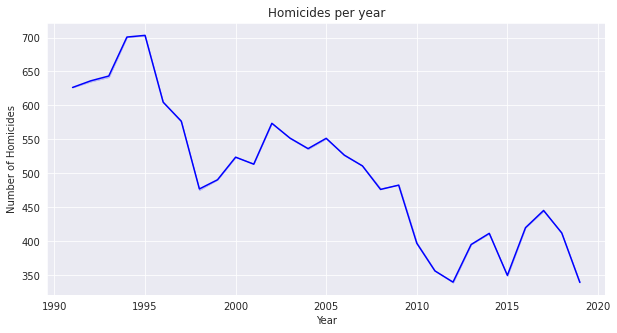

In [ ]:
# importing the plot packages
import seaborn as sns;
import matplotlib.pyplot as plt;

# setting the style to have a darkgrid in the background of our plot
sns.set_style('darkgrid');

# adjusting our plot size
fig, ax = plt.subplots(figsize=(10, 5));

# plotting and setting the axes' labels
sns.lineplot(x=df.vano, y=df.hom_doloso, ci=0, color='blue');
plt.xlabel('Year');
plt.ylabel('Number of Homicides');
plt.title('Homicides per year');

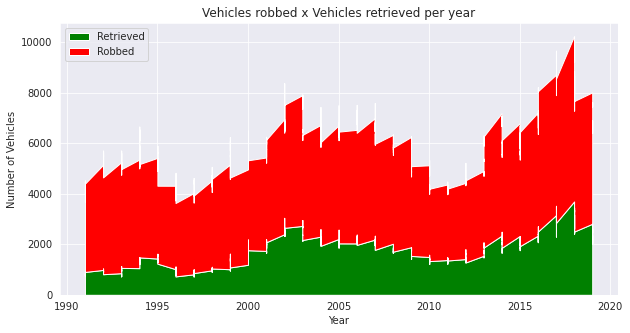

In [ ]:
# making a copy of the dataset and creating a new column 
df_stackplot = df.copy()
df_stackplot['sum_vehicles'] = df_stackplot['roubo_veiculo'] + df_stackplot['furto_veiculos']

# adjusting our plot size
fig, ax = plt.subplots(figsize=(10,5));

# defining the colors and labels of our plot
labels = ['Retrieved', 'Robbed']
colors = ['g', 'r']

# creating the plot
plt.stackplot(df_stackplot['vano'], df_stackplot['recuperacao_veiculos'], df_stackplot['sum_vehicles'], 
               colors=colors, labels=labels);

# setting the plot's labels, title and legend
plt.xlabel('Year');
plt.ylabel('Number of Vehicles');
plt.legend(loc='upper left');
plt.title('Vehicles robbed x Vehicles retrieved per year');

As we can see in the two plots above:
* The number of homicides fell greatly after 2005 and had one of its lowest value in the last year (2019), what is a good sign.
* On the other hand, the number of vehicles robbed has increased since 2010 with the number of vehicles retrieved following its tendency.

## Conclusion

With this brief exploratory analysis, it was possible to gather information about our dataset, which has a lot of issues concerning missing values. Despite of that, we can see how the numbers of homicides and vehicles robbery behaved throughout the years, showing that the number of homicides decreased since 2005, which has not occurred with the number of vehicles robbed.

A lot of other analysis could be done to understand even better how is the violence in Rio de Janeiro, but the focus of this one was homicides and vehicles.

